<a href="https://colab.research.google.com/github/tarun3001/A-B-testing-/blob/main/Google_colab_A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

user_id,group,converted
1,control,0
2,control,1
3,control,0
4,control,0
5,control,1
6,control,0
7,control,0
8,control,1
9,control,0
10,control,0
11,treatment,1
12,treatment,1
13,treatment,0
14,treatment,1
15,treatment,0
16,treatment,1
17,treatment,0
18,treatment,1
19,treatment,1
20,treatment,0


In [4]:
import pandas as pd

data={
    "user_id":range(1,21),
    "group" :["control"]*10 + ["treatment"]*10,
    "converted": [0,1,0,0,1,0,0,1,0,0, 1,1,0,1,0,1,0,1,1,0]
}

df= pd.DataFrame(data)
df

,user_id,group,converted
0,1,control,0
1,2,control,1
2,3,control,0
3,4,control,0
4,5,control,1
5,6,control,0
6,7,control,0
7,8,control,1
8,9,control,0
9,10,control,0


In [7]:
df.groupby("group").size()

,0
group,
control,10
treatment,10


In [10]:
conversion_rates=df.groupby("group")["converted"].mean()
conversion_rates

,converted
group,
control,0.3
treatment,0.6


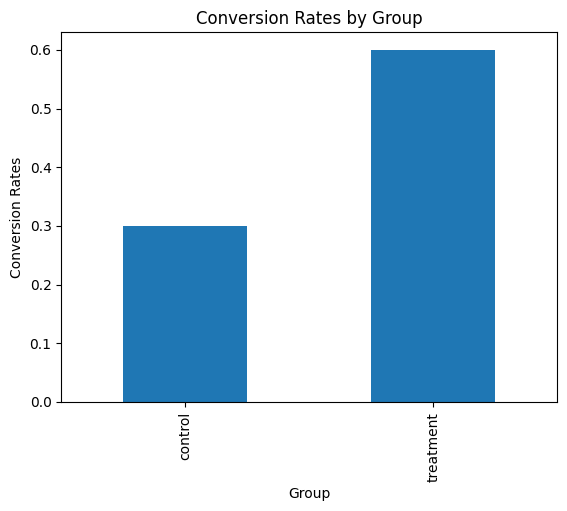

In [13]:
import matplotlib.pyplot as plt
conversion_rates.plot(kind="bar")
plt.title("Conversion Rates by Group")
plt.ylabel("Conversion Rates")
plt.xlabel("Group")
plt.show()

In [14]:
from statsmodels.stats.proportion import proportions_ztest

# Number of conversions per group
successes = df.groupby("group")["converted"].sum().values

# Number of users per group
samples = df.groupby("group").size().values

z_stat, p_value = proportions_ztest(successes, samples)

z_stat, p_value


(np.float64(-1.348399724926484), np.float64(0.17752985241215347))

In [15]:
from statsmodels.stats.api import CompareMeans, DescrStatsW

control = df[df["group"] == "control"]["converted"]
treatment = df[df["group"] == "treatment"]["converted"]

cm = CompareMeans(DescrStatsW(treatment), DescrStatsW(control))
ci_low, ci_high = cm.tconfint_diff()

ci_low, ci_high


(np.float64(-0.16978044974063355), np.float64(0.7697804497406335))

In [16]:
from statsmodels.stats.power import NormalIndPower

analysis = NormalIndPower()

power = analysis.power(
    effect_size=0.3,  # large effect, unrealistically generous
    nobs1=10,
    alpha=0.05
)

power


np.float64(0.1029334889235367)

In [17]:
required_n = analysis.solve_power(
    effect_size=0.1,  # realistic effect
    power=0.8,
    alpha=0.05
)

required_n


1569.7721019023288

“The treatment group shows a higher conversion rate, but the experiment is underpowered due to a small sample size. The p-value and confidence interval indicate that the observed lift may be due to random variation. A larger sample is required before making a decision.”
